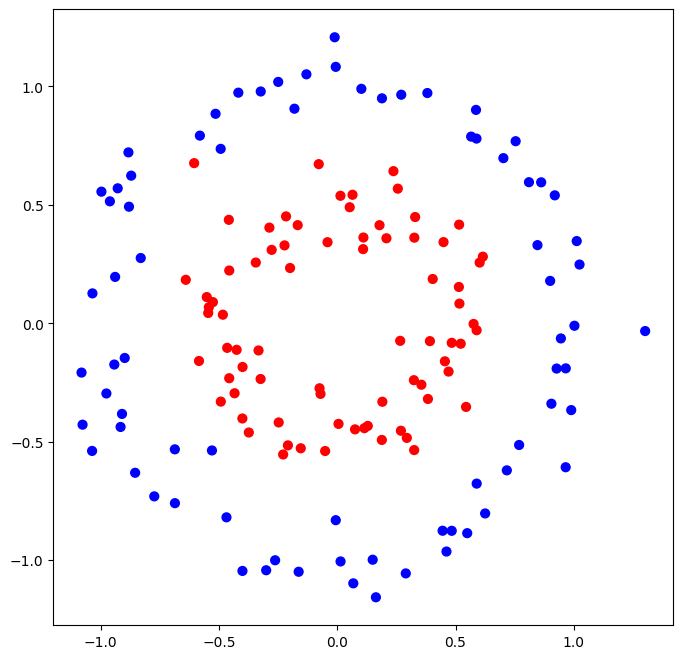

In [2]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

%matplotlib inline
x2, y2 = make_circles(150, factor=0.5, noise=0.1, random_state=30)  # 生成示例数据

plt.figure(figsize=(8, 8))  # 绘图
plt.scatter(x2[:, 0], x2[:, 1], c=y2, s=40, cmap="bwr")

In [3]:
# 核函数
def kernel_function(xi, xj):
    poly = xi**2 + xj**2
    return poly

Text(0.5, 0, 'r')

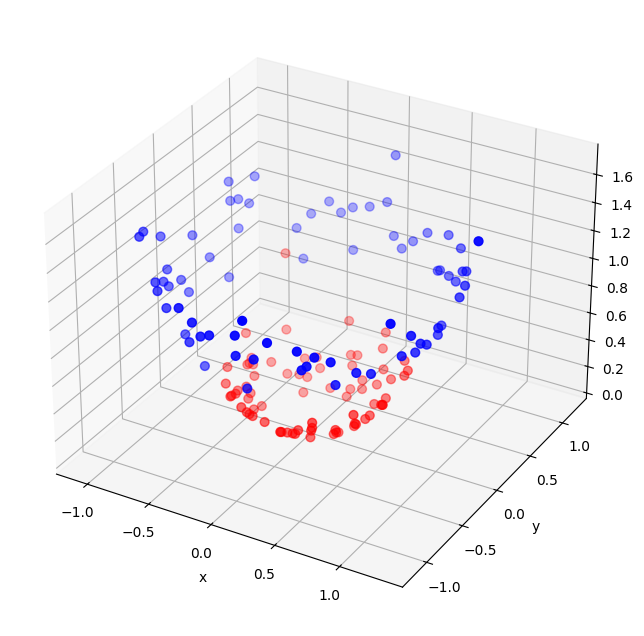

In [4]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

# 通过核函数将数据映射到高维,在丢数据给 SVC 和设定算法后，值会被处理
r = kernel_function(x2[:, 0], x2[:, 1])
plt.figure(figsize=(10, 8))
ax = plt.subplot(projection="3d")
ax.scatter3D(x2[:, 0], x2[:, 1], r, c=y2, s=40, cmap="bwr")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("r")

In [6]:
from sklearn.svm import SVC

rbf_svc = SVC(kernel="rbf", gamma="auto")
rbf_svc.fit(x2, y2)

SVC(gamma='auto')

In [10]:
import numpy as np
def svc_plot(model):
    # 获取到当前 Axes 子图数据，并为绘制分割线做准备
    ax = plt.gca()
    x = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], 50)
    y = np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 50)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # 使用轮廓线方法绘制分割线
    ax.contour(X, Y, P, colors="green", levels=[-1, 0, 1], linestyles=["--", "-", "--"])

    # 标记出支持向量的位置
    ax.scatter(
        model.support_vectors_[:, 0], model.support_vectors_[:, 1], c="green", s=100
    )

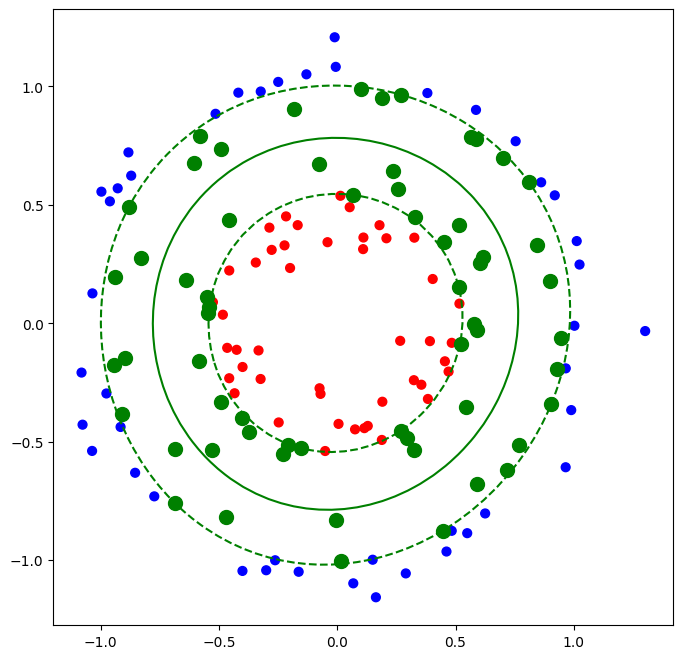

In [11]:
plt.figure(figsize=(8, 8))
plt.scatter(x2[:, 0], x2[:, 1], c=y2, s=40, cmap="bwr")

svc_plot(rbf_svc)

In [12]:
def change_c(c):
    rbf_svc.C = c
    rbf_svc.fit(x2, y2)
    plt.figure(figsize=(8, 8))
    plt.scatter(x2[:, 0], x2[:, 1], c=y2, s=40, cmap="bwr")
    svc_plot(rbf_svc)


interact(change_c, c=[1, 100, 10000])

interactive(children=(Dropdown(description='c', options=(1, 100, 10000), value=1), Output()), _dom_classes=('w…

<function __main__.change_c(c)>